<a href="https://colab.research.google.com/github/jw4570/2024/blob/main/0310/bandit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 강화 학습 환경 복습

In [3]:
!pip install gymnasium[classic-control]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.9/953.9 kB 6.0 MB/s eta 0:00:00


### 강화 학습 문제를 직접 풀어낼 정책 정의

강화 학습에서는 어떤 함수를 학습하고자 하는 걸까요? 에이전트 안에는 상태 관측값(입력)을 받고 그것을 앞으로 취해야 할 최적의 행동(출력)에 매핑하는 함수가 있습니다. 예를 들어, 미로 속 에이전트의 현재 상태가 $(2, 3)$ 좌표라면, 에이전트 안의 함수는 이 입력값을 "오른쪽으로 이동"이라는 출력값에 매핑하는 것이 될 수 있습니다. 이 함수를 $\pi$라고 한다면, 아래와 같이 수식으로 쓸 수 있습니다.
$$
\pi((2, 3)) = \text{"오른쪽으로 이동"}
$$
강화 학습 용어로 이 함수를 정책(policy)이라고 부릅니다.

In [ ]:
def policy(state):
    x_position = state[0]
    x_velocity = state[1]

    if x_velocity > 0:
        action = 2
    elif x_velocity < 0:
        action = 0
    else:
        if x_position > -0.6:
            action = 0
        else:
            action = 2

    return action

### 강화 학습이 돌아가는 환경의 코드 복습

1. 인공지능 모델은 환경의 현재 상태(state)를 관찰할 수 있습니다. 미로 찾기 문제에서 환경의 현재 상태란 미로 속 현재 위치를 의미합니다. 예를 들어, 모델이 미로의 $(2, 3)$ 좌표에 있다면, 이 좌표는 현재 상태를 나타냅니다.

2. 인공지능 모델은 관찰된 상태로부터 앞으로 취할 행동(action)을 결정합니다. 양갈래 길 중에서 어디로 갈지 결정하는 것 등이 그 예시가 될 수 있습니다.

3. 환경은 상태를 변경(transition)시키고 그 행동에 대한 보상(reward)을 생성합니다. 인공지능 모델은 그 상태와 보상을 다 받습니다. 미로 찾기 문제에서 환경의 변화란 인공지능 모델의 (앞선 결정에 따른) 미로 속 위치 변화를 의미합니다. 예를 들어, '오른쪽으로 이동' 행동을 취하면, 에이전트의 위치 좌표가 $(2, 3)$에서 $(2, 4)$로 바뀔 수 있습니다. 보상은 출구를 찾았을 때 주어지는 경품이나 막다른 길에 도달했을 때 받는 페널티 등을 생각해 볼 수 있습니다.

4.  이 새로운 정보(환경의 변화와 이에 따른 보상)를 사용하여 인공지능은 그런 행동이 좋아 그걸 반복해야 하는지, 또는 좋지 않아 회피해야 하는지 결정할 수 있습니다. 완료될 때까지 (done) 이 관측-행동-보상 사이클은 계속됩니다.

In [5]:
import gymnasium as gym

env = gym.make('MountainCar-v0')
state, _ = env.reset()
print("Initial state:", state)

done = False
total_reward = 0
while not done:
    action = policy(state)
    print("Chose action:", action)
    state, reward, done, _, _ = env.step(action)
    total_reward += reward
    print("New state:", state)
    print("Reward:", reward)

print("Final state:", state)
print("Total reward:", total_reward)
env.close()


Initial state: [-0.5439309  0.       ]


NameError: name 'policy' is not defined

### 환경 직접 만들어보기

In [1132]:
class MyEnv(gym.Env):
    def __init__(self):
        self.observation_space = gym.spaces.Discrete(7, start=-3)
        self.action_space = gym.spaces.Discrete(2)
        self.num_steps = 0

    def reset(self):
        state = 0
        return state

    def step(self, action):
        self.num_steps += 1

        if action == 0:
            next_state = state - 1
        else:
            next_state = state + 1

        if next_state > 3:
            next_state = 3
        elif next_state < -3:
            next_state = -3

        reward = {
            -3: 1,
            -2: 1,
            -1: 1,
            0: 0,
            1: -1,
            2: -1,
            3: 10
        }[next_state]

        done = self.num_steps >= 3
        return next_state, reward, done, {}


In [1133]:
class StudentMDP(gym.Env):
    def __init__(self):
        # 0: 수업, 1: 야자, 2: 집, 3: 잘침, 4: 못침
        self.observation_space = gym.spaces.Discrete(5)

        # 0: 공부, 1: 딴짓, 2: 땡땡이, 3: 쇼츠보기, 4: 벼락치기, 5: 수면
        self.action_space = gym.spaces.Discrete(6)

    def reset(self):
        state = ???
        return state

    def step(self, action):
        state = ???
        reward = ???
        done = ???
        return state, reward, done, {}

SyntaxError: invalid syntax (<ipython-input-1133-d39ec6884da4>, line 10)

# 슬롯머신 정복하기


### 슬롯머신 환경 구현하기

각각의 밴딧 $i = 1, \cdots, n$에 대해, 먼저 랜덤하게 실제 가치 $\mu_{i} \sim N(0, 1)$를 평균 0 분산 1인 표준정규분포에서 추출해 정해줍니다. 그리고 $i$번 째 밴딧을 고를 경우, 받을 수 있는 보상은 다음과 같이 정해줍니다:
$$
r_{t} = \mu_{i} + \varepsilon \quad \text{where} \quad \varepsilon \sim N(0, 1)
$$
즉, $i$번 째 밴딧을 골랐을 때의 보상은, 그 밴딧의 실제 가치 $\mu_{i}$에 랜덤한 표준 정규 노이즈 $\varepsilon \sim N(0, 1)$을 더한 것입니다.

In [1]:
import numpy as np

np.random.normal()

0.36274503352596943

In [747]:
import numpy as np
import gymnasium as gym

class BanditEnv(gym.Env):
    def __init__(self, num_bandits):
        self.num_bandits = num_bandits # 슬롯머신의 갯수
        self.action_space = list(range(num_bandits)) # 0~n-1번째 슬롯머신 선택 가능
        self.observation_space = [0]

    def reset(self):
        # self.mean = np.random.normal(size=self.num_bandits) * 10
        # 보상을 정해둠
        self.mean = [8, 9, 7.5, 7, 8.5, 7, 6, 7.5, 8, 8.5]
        return 0

    def step(self, action):
        state = 0 # 슬롯머신의 상태가 없음 > 항상 같음
        mean = self.mean[action]
        reward = mean + np.random.normal()
        done = False
        return state, reward, done, {}


### 가중치로 구현

In [1076]:
import random

safety = 10 # 기대값이 작은수는 선택X 큰수 선택O

def weights(x):
    res = x[:]
    MIN = min(res)
    for i in range(len(res)):
        res[i] -= MIN # 모든 수를 양수로 만듦
        res[i] = res[i]**safety + 1 # 선택 확률이 0이 되지 않게 +1
    return res

class MyPolicy2():
    def __init__(self, num_bandits):
        self.num_bandits = num_bandits # 술롯머신 개수 저장
        self.s = [0]*num_bandits # 보상의 합
        self.n = [0]*num_bandits # 슬롯머신 선택 횟수
        self.q = [0]*num_bandits # s/n (기대값)
        self.total = 0 # 총합

    def __call__(self, state, reward, action = -1):
        if action == -1:
            action = random.choices(list(range(self.num_bandits)), weights(self.q))[0]
        return action

    def setValue(self, action, reward):
        self.s[action] += reward # 보상 합에 보상 추가
        self.n[action] += 1 # 선택 횟수 추가
        self.total += reward # 총합 추가
        self.q[action] = self.s[action]/self.n[action] # 기댓값 계산

Total reward: 89416.17687639642
보상 합:      [1022.4091518946237, 82263.61266078771, 7.129575657708464, 6.712668286872702, 6029.22307610256, 6.3303797031375, 6.423818548080709, 6.2905024936358584, 21.971364672977657, 46.073678249228934]
선택 횟수:    [127, 9149, 1, 1, 710, 1, 1, 1, 3, 6]
기댓값:       [8.050465762949793, 8.99154144286673, 7.129575657708464, 6.712668286872702, 8.491863487468395, 6.3303797031375, 6.423818548080709, 6.2905024936358584, 7.323788224325885, 7.678946374871489]


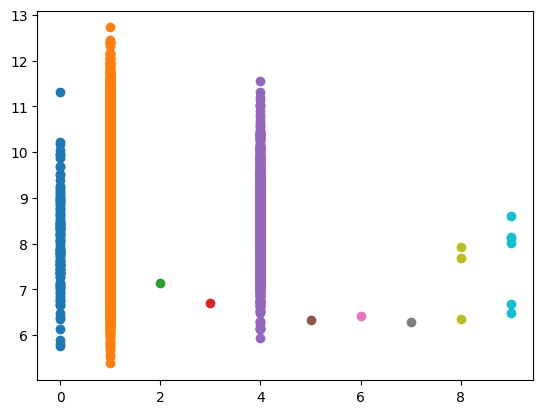

In [1098]:
num_bandits = 10 # 슬롯머신 개수
choices = 10000 # 선택 횟수

required = 1 # 모든 슬롯머신을 돌리는 것을 몇번 실행?

history = {i: [] for i in range(env.num_bandits)}

env = BanditEnv(num_bandits)
state = env.reset()
total_reward = 0
agent = MyPolicy2(num_bandits)
reward = 0

for _ in range(required):
    for action in range(num_bandits):
        agent(state, reward)
        state, reward, done, _ = env.step(action)
        agent.setValue(action, reward)

        history[action].append(reward)

for _ in range(choices-num_bandits*required):
    action = agent(state, reward)
    state, reward, done, _ = env.step(action)
    agent.setValue(action, reward)

    history[action].append(reward)
    # print("Action:", action, "Reward:", reward)

print("Total reward:", agent.total)
print("보상 합:     ", agent.s)
print("선택 횟수:   ", agent.n)
print("기댓값:      ", agent.q)
# print(positive(agent.q))

import matplotlib.pyplot as plt
for machine in range(env.num_bandits):
    plt.scatter([machine]*len(history[machine]), history[machine])

### 그리드로 구현

In [1111]:
import numpy as np

class MyPolicy():
    def __init__(self, num_bandits):
        self.num_bandits = num_bandits # 술롯머신 개수 저장

        # 처음 가치 추정치
        initial_q = 100

        self.q = [initial_q]*num_bandits # 평균값
        self.n = [0]*num_bandits # 선택 횟수
        self.epsilon = 0.01 # 랜덤 선택할 확률

    def __call__(self, state):
        action = [np.argmax(self.q), np.random.randint(self.num_bandits)][np.random.random() < self.epsilon] # epsilon보다 작을 경우 랜덤 선택
        # action = np.argmax(self.q)

        # argmax >
        # max(list(range(self.num_bandits)), key = lambda x: self.q[x])
        return action

In [1131]:
num_bandits = 10 # 슬롯머신 개수
choices = 10000 # 선택 횟수

env = BanditEnv(num_bandits)
state = env.reset()
total_reward = 0
agent = MyPolicy(num_bandits)
reward = 0

cnt = [0]*env.num_bandits


for _ in range(choices):
    action = agent(state)
    state, reward, done, _ = env.step(action)
    # print("Action:", action, "Reward:", reward)

    agent.n[action] += 1
    agent.q[action] += (reward - agent.q[action]) / agent.n[action] # 평균값을 데이터 효율적으로 업데이트 및 저장
    total_reward += reward

print("Total reward:", total_reward)
# print("보상 합:     ", agent.s)
print("선택 횟수:   ", agent.n)
print("기댓값:      ", agent.q)
# print(positive(agent.q))

# import matplotlib.pyplot as plt
# for machine in range(env.num_bandits):
#     plt.scatter([machine]*(len(history[machine])-1), history[machine][1:])


Total reward: 89628.1114146473
선택 횟수:    [7, 9433, 8, 15, 473, 11, 7, 13, 12, 21]
기댓값:       [7.685348257272362, 8.997317859188176, 7.770685951745193, 6.899087400193046, 8.566823017071934, 6.611320632685022, 6.031593697774013, 7.595951832584423, 7.824718508447007, 8.44123079351201]


### 슬롯머신 풀어보기

직접 위 환경과 상호작용하면서, 각 슬롯머신의 보상을 추정해보세요. 그리고 Python을 이용해 위 문제에서 $\epsilon=0.1$과 $\epsilon=0.01$에 대해 각각 $\epsilon$-greedy 방법을 적용해 보세요. (초기값 $Q_{1}(i)$는 모두 0으로 설정.) 또한 $Q_{1}(i) = 5$인 완전 탐욕적인 알고리즘 ($\epsilon=0$) 또한 Python으로 구현하여 그 결과를 비교해 보세요.

In [814]:
import numpy as np

class EpsilonGreedyPolicy:
    def __init__(self, num_bandits, epsilon):
        self.num_bandits = num_bandits
        self.epsilon = epsilon
        ????

    def select_action(self):
        action = ????
        return action


env = BanditEnv(10)
policy = EpsilonGreedyPolicy(10, 0.1)

state = env.reset()
total_reward = 0
for t in range(100):
    action = policy.select_action()
    state, reward, done, _ = env.step(action)
    print("Action:", action, "Reward:", reward)
    total_reward += reward

print("Total reward:", total_reward)

SyntaxError: invalid syntax (<ipython-input-814-5ed2b62abef5>, line 10)